In [10]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.circuit.library import CSwapGate
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

Assunimg quantum theory is universally valid, we can describe some systems to simulate time-travel paradoxes, like the *Grandfather Paradox,* most recently solved by the *Novikov Self-consistency Principle.*

The *Consistency Condition* is represented by the  Reduced Density Matrix $$\rho_{\mathrm{ctc}}=\mathrm{tr_1}\big[U(\bra{\psi_{\mathrm{in}}}\ket{\psi_{\mathrm{in}}}\otimes\rho_{\mathrm{ctc}})\,U^\dagger\big]$$ where
- $\ket{\psi_{\mathrm{in}}}$ is the initial state of the system, and
- $U$ is the unitary operator that describes time evolution.

We'll start with a *System Qubit* $\ket\psi$, a *Time Qubit* which must be in the same state at both ends of the CTC, and a *Control Qubit* to control the CTC.

You can choose the initial state of the system qubit, and the time qubit will be set to $\ket{0}$:

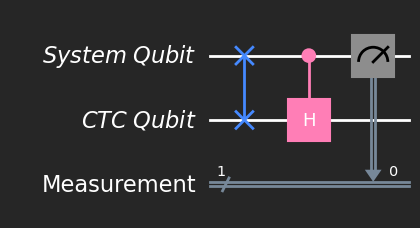

In [6]:
user_input = input(r"Enter initial state '+' or '-': ")

sys = QuantumRegister(1, 'System Qubit')
ctc = QuantumRegister(1, 'CTC Qubit')
cr = ClassicalRegister(1, 'Measurement')

qc = QuantumCircuit(sys, ctc, cr)

if user_input == '-':
    qc.h(sys)
    qc.z(ctc)
    
    qc.barrier()
    qc.x(ctc)
    
    qc.barrier()

qc.swap(sys, ctc)
qc.ch(sys, ctc)
qc.measure(sys, cr)

qc.draw('mpl', style = 'iqx-dark')

The additional segment is added to prepare the System Qubit in the $\ket{-}$ state, and then to prepare the Time Qubit in the $\ket{1}$ state, which is needed to satsify consistency.

The time-dependency here simulates what a time-travel paradox would entail in a quantum system, and is **automcatically selfconsistent,** regardless of choice of initial state.

In [9]:
backend = AerSimulator()    
transpiled_qc = transpile(qc, backend)

resukt = backend.run(transpiled_qc).result()
counts = resukt.get_counts(transpiled_qc)
                           
print('Results of Measurement: ', counts)

Results of Measurement:  {'0': 1024}


Try it, the results are the same for both choices! This demonstrates the distincion between states $\ket{0}$ and $\ket{-}$ with a single measurement.

We can additionally extend this setup to allow distinguishing **all four** states $\ket{0}$, $\ket{1}$, $\ket{+}$ and $\ket{-}$ with a single measurement:

In [11]:
ccswap = CSwapGate(ctrl_state =  0).control(1, ctrl_state = 0)

qc_X2 = QuantumCircuit(2)
qc_X2.x(0)
qc_X2.x(1)

X2 = qc_X2.to_gate()
X2.name = 'X2'
ccxx = X2.control(2, ctrl_state = '10')

qc_xh = QuantumCircuit(1)
qc_xh.h(0)
qc_xh.x(0)

XH = qc_xh.to_gate()
XH.name = 'XH'
ccxh = XH.control(2, ctrl_state = '01')

qc_4 = QuantumCircuit(2)
qc_4.swap(0, 1)
qc_4.x(0)
qc_4.h(1)

X1_H2_SWAP = qc_4.to_gate()
X1_H2_SWAP.name = 'X1_H2_SWAP'
xhs = X1_H2_SWAP.control(2, ctrl_state = '11')

Try it with the input of your choice:

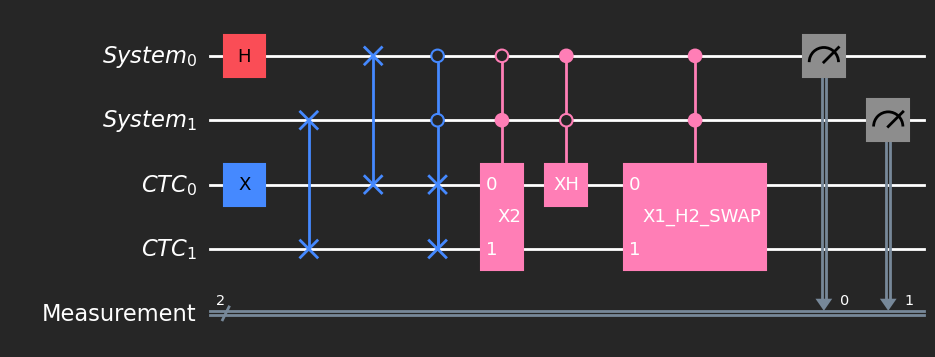

In [16]:
user_input = input(r"Enter initial state of first qubit '0', '1', '+', or '-': ")
sys, ctc, cr = QuantumRegister(2, 'System'), QuantumRegister(2, 'CTC'), ClassicalRegister(2, 'Measurement')
qc = QuantumCircuit(sys, ctc, cr)

if user_input == '1':
    qc.x(sys[0]); qc.x(ctc[1])
elif user_input == '+':
    qc.h(sys[0]); qc.x(ctc[0])
elif user_input == '-':
    qc.x(sys[0]); qc.h(sys[0]); qc.x(ctc)

qc.swap(sys[0], ctc[0]); qc.swap(sys[1], ctc[1])

qc.append(ccswap, [sys[0], sys[1], ctc[0], ctc[1]])
qc.append(ccxx, [sys[0], sys[1], ctc[0], ctc[1]])
qc.append(ccxh, [sys[0], sys[1], ctc[0]])
qc.append(xhs, [sys[0], sys[1], ctc[0], ctc[1]])

qc.measure(sys[0], cr[0]); qc.measure(sys[1], cr[1])

qc.draw('mpl', style = 'iqx-dark')

In [17]:
transpiled_qc = transpile(qc, backend) 
result = backend.run(transpiled_qc).result()
counts = result.get_counts(transpiled_qc)

print('Results of Measurement: ', counts)

Results of Measurement:  {'01': 1024}
